# **Hipotesis**

## **Objetivo del análisis**
Este proyecto tiene como objetivo identificar y analizar cuáles son los locales de pizza más populares en Estados Unidos, considerando tanto la cantidad total de locales como la presencia geográfica de las principales cadenas. No se limita únicamente a pizzerías, sino que también contempla restaurantes y bares que ofrecen pizza como parte de su menú. Por eso, también se busca distinguir cuántos locales están especializados exclusivamente en pizza frente a aquellos que la ofrecen como un producto secundario.

Data set [Aqui](https://www.kaggle.com/datasets/datafiniti/pizza-restaurants-and-the-pizza-they-sell)

## **Importancia del proyecto**

> Contar con esta información puede ser clave para tomar decisiones estratégicas, tanto para grandes cadenas como para emprendimientos más pequeños. Conocer qué regiones están menos saturadas permite detectar oportunidades comerciales. Además, al disponer de datos de ubicación, es posible realizar un análisis más exhaustivo para evaluar qué zonas podrían ser más convenientes a la hora de alquilar un local e iniciar un negocio. En este sentido, el valor del análisis radica en su utilidad para apoyar decisiones competitivas y de expansión comercial.



## **Limitaciones y consideraciones**
Es importante aclarar que este análisis tiene un carácter exploratorio y no garantiza resultados comerciales favorables. No se contemplan factores como el interés del público en el producto, la densidad de población, el tipo de zona (residencial, comercial, etc.), ni otras variables sociales o económicas que podrían afectar la rentabilidad de un negocio. El propósito es brindar una visión general sobre la presencia de las cadenas de pizza en distintas regiones y ofrecer datos útiles para un análisis más detallado posterior.

## **Preguntas orientadoras del análisis**

A continuación, se presentan algunas de las principales preguntas que guiarán esta investigación:


*   ¿Cuántos locales de pizza hay en cada ciudad?

*   ¿Cuál es la ciudad con mayor cantidad de locales?

*   ¿Cuál es la ciudad con menor cantidad?

*   ¿Qué cadena de pizzas tiene más sucursales?

*   ¿Cuál es el local con el menú más caro?

*   ¿Existe alguna relación geográfica en cuanto a los precios?

*   ¿Cuáles son las cadenas más caras y más económicas?





# **Importacion de elementos**

Aca se vera los elementos a tener en cuenta para el analisis general

In [ ]:
#Importar cosas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
#Importar Librerias
#import pandas as pd
!gdown 1GtTwZ5t3jt5Jn805GkgmbZ-doSfAWhNc
#https://drive.google.com/file/d/1GtTwZ5t3jt5Jn805GkgmbZ-doSfAWhNc/view?usp=sharing


Downloading...
From: https://drive.google.com/uc?id=1GtTwZ5t3jt5Jn805GkgmbZ-doSfAWhNc
To: /content/LocalesDePizza.csv
100% 1.12M/1.12M [00:00<00:00, 31.0MB/s]


In [ ]:
#Asociar la ruta a una variable
df2 = pd.read_csv('/content/LocalesDePizza.csv', sep=';')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3510 non-null   object 
 1   address             3510 non-null   object 
 2   categories          3510 non-null   object 
 3   city                3508 non-null   object 
 4   country             3508 non-null   object 
 5   keys                3508 non-null   object 
 6   latitude            3508 non-null   object 
 7   longitude           3508 non-null   object 
 8   menuPageURL         610 non-null    object 
 9   menus.amountMax     2946 non-null   float64
 10  menus.amountMin     2946 non-null   float64
 11  menus.currency      2949 non-null   object 
 12  menus.dateSeen      3508 non-null   object 
 13  menus.description   1526 non-null   object 
 14  menus.name          3508 non-null   object 
 15  name                3508 non-null   object 
 16  postal

# **Limpieza de Datos y normalizacion**

En el conjunto de datos original se registraron 3.500 filas y 21 columnas. Al realizar una primera revisión exploratoria, se detectó una cantidad significativa de valores nulos o vacíos, especialmente en campos que podrían resultar relevantes para el análisis. Por este motivo, se procedió a una etapa de normalización utilizando técnicas de reemplazo.

Los campos con mayor cantidad de datos faltantes se encontraban principalmente en el área de los menús: menuPageURL, menus.amountMax, menus.amountMin (ambos con resultados idénticamente nulos, lo que sugiere que los menús no fueron cargados), menus.currency y menus.description. También se identificaron inconsistencias en los campos relacionados con rangos de precios: priceRangeMin y priceRangeMax.

Las acciones de limpieza y normalización aplicadas fueron las siguientes:

Se calcularon promedios para completar los valores cuantitativos cuando resultaba coherente, especialmente en los campos de precios.

Se reemplazaron celdas vacías con valores nulos explícitos o estimaciones, según su relevancia para el análisis general del conjunto de datos.

In [ ]:
#Visualizar tabla
df2

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,4.410.266.476,-1.213.007.971,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,USD,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,4.410.266.476,-1.213.007.971,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,USD,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,3.406.456.347,-1.184.690.173,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,3.406.456.347,-1.184.690.173,NaN,13.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,3.406.456.347,-1.184.690.173,NaN,13.00,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,AVweYUZ0IN2L1WUf4Z9q,305 Ash St,Bar and Gastropub,Jefferson City,US,us/honeycreek/jeffersoncity/305ashst/-735513695,38.568.717,-92.161.596,NaN,11.99,...,USD,2016-07-06T20:05:49Z,NaN,Supreme Pizza,Prison Brews Brewery & Restaurant,65101,USD,25.0,40.0,Honey Creek
3506,AVweYUZ0IN2L1WUf4Z9q,305 Ash St,Bar and Gastropub,Jefferson City,US,us/honeycreek/jeffersoncity/305ashst/-735513695,38.568.717,-92.161.596,NaN,9.99,...,USD,2016-07-06T20:05:49Z,NaN,Vegetarian Pizza,Prison Brews Brewery & Restaurant,65101,USD,25.0,40.0,Honey Creek
3507,AVweZ5SbIN2L1WUf4nWU,4140 Carlisle Rd,"Restaurant,Italian Restaurant",Dover,US,us/davidsburg/dover/4140carlislerd/-1821521454,39.996.444,-768.451.799,NaN,5.00,...,USD,2015-10-23T01:03:47Z,NaN,Pita Pizza,Moonlight Cafe,17315,USD,0.0,30.0,Davidsburg
3508,AVweZ5SbIN2L1WUf4nWU,4140 Carlisle Rd,"Restaurant,Italian Restaurant",Dover,US,us/davidsburg/dover/4140carlislerd/-1821521454,39.996.444,-768.451.799,NaN,20.00,...,USD,2015-10-23T01:03:47Z,NaN,Steak Pizzaiola,Moonlight Cafe,17315,USD,0.0,30.0,Davidsburg


In [ ]:
#Descripciones
df2.describe()


,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax
count,2946.000000,2946.000000,1556.000000,1556.000000
mean,12.480869,11.428819,15.607969,36.570694
std,13.403291,7.265242,18.497568,21.744190
min,0.000000,0.000000,0.000000,12.000000
25%,7.500000,7.000000,0.000000,30.000000
50%,11.915000,10.990000,25.000000,40.000000
75%,15.950000,14.950000,25.000000,40.000000
max,312.950000,118.990000,347.000000,666.000000


In [ ]:
#ver nulos
df2.isnull().sum()

,0
id,0
address,0
categories,0
city,2
country,2
keys,2
latitude,2
longitude,2
menuPageURL,2900
menus.amountMax,564


In [ ]:
df2.shape

(3510, 21)

In [ ]:
df2[df2['city'].isnull()]

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
1275,AVwcx5-ZIN2L1WUfo0Dn,12833 Ventura Blvd,"feature - Happy Hour,American (traditional) Se...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,USD,NaN,NaN,NaN
3247,AVweeTZf_7pvs4fzDT_w,9208 3rd Ave,"New York City,Restaurant,Brooklyn,Japanese Sushi,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,USD,NaN,NaN,NaN


In [ ]:
#Transformación y Reemplazo de Nulos por un valor
df2['city']= df2['city'].fillna('Sin localizar')

In [ ]:
df2[df2['city']=='Sin localizar']

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
1275,AVwcx5-ZIN2L1WUfo0Dn,12833 Ventura Blvd,"feature - Happy Hour,American (traditional) Se...",Sin localizar,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,USD,NaN,NaN,NaN
3247,AVweeTZf_7pvs4fzDT_w,9208 3rd Ave,"New York City,Restaurant,Brooklyn,Japanese Sushi,",Sin localizar,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,USD,NaN,NaN,NaN


In [ ]:
#Remplazo de localizaciones
df2['country']= df2['country'].fillna('Sin localizar')
df2['keys']= df2['keys'].fillna('sinLocalizacion')
df2['latitude']= df2['latitude'].fillna(0)
df2['longitude']= df2['longitude'].fillna(0)


In [ ]:
#Normalizar MenusUrl
df2[df2['menus.amountMax'].isnull()]

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
16,AVwc_dHKkufWRAb51Kei,1 N University Hl,"University,University University",Provo,US,us/ut/provo/1nuniversityhl/-27460736,4.025.083.927,-1.116.492.677,NaN,NaN,...,NaN,"2016-03-31T02:22:37Z,2016-06-08T16:20:20Z",NaN,House Made Pizza,Brigham Young University,84602,USD,NaN,NaN,UT
18,AVwc_dHKkufWRAb51Kei,1 N University Hl,"University,University University",Provo,US,us/ut/provo/1nuniversityhl/-27460736,4.025.083.927,-1.116.492.677,NaN,NaN,...,NaN,"2016-03-31T02:22:37Z,2016-06-08T16:20:20Z",1 each (324.00 g),Pepperoni Pizza,Brigham Young University,84602,USD,NaN,NaN,UT
19,AVwc_dHKkufWRAb51Kei,1 N University Hl,"University,University University",Provo,US,us/ut/provo/1nuniversityhl/-27460736,4.025.083.927,-1.116.492.677,NaN,NaN,...,NaN,"2016-03-31T02:22:37Z,2016-06-08T16:20:20Z",1 each (149.18 g),Pizza Bagel,Brigham Young University,84602,USD,NaN,NaN,UT
20,AVwc_gjWByjofQCxkYOz,9595 Six Pines Dr,"Sporting Goods Shop,Shoe Store,Sporting Goods ...",Spring,US,us/tx/spring/9595sixpinesdr/-327153848,3.016.413,-9.546.235,NaN,NaN,...,NaN,2016-06-04T20:48:53Z,NaN,Pizza Con Uovo Fritto,Luke's Locker,77380,USD,0.0,25.0,TX
23,AVwc_h3pkufWRAb51LOO,200 E Chestnut St,"Italian Restaurant,Restaurant,Italian Restaura...",Chicago,US,us/ontariostreet/chicago/200echestnutst/833773736,4.189.854.289,-876.219.955,NaN,NaN,...,NaN,"2016-01-12T23:21:20Z,2016-01-27T13:33:07Z",NaN,Pizza Schiacchiata Alla Toscana,Francesca's On Chestnut,60611,USD,25.0,40.0,Ontario Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491,AVweV-z3ByjofQCxxYGm,757 Broadway,"Pizza Place,Italian Restaurant",New York,US,us/manhattan/newyork/757broadway/-1559498545,4.073.056.417,-7.399.272.767,NaN,NaN,...,NaN,2015-11-02T16:45:38Z,NaN,Sicilian Style (thick Crust Pizza),Famous Famiglia,10003,USD,NaN,NaN,Manhattan
3495,AVweX6kd_7pvs4fzCanL,2810 Business Center Dr,Italian Restaurant,Pearland,US,us/tx/pearland/2810businesscenterdr/1342273942,29.556.607,-9.539.258.415,NaN,NaN,...,NaN,2017-02-13T04:03:46Z,NaN,Margherita Pizza,The Pizza Parlor,77584,USD,25.0,40.0,TX
3499,AVweYGZXByjofQCxxqPk,10727 Randolph Saint Crown Point In,Bar and Sports Bar,Crown Point,US,us/palmer/crownpoint/10727randolphsaintcrownpo...,4.142.250.903,-8.723.772.331,NaN,NaN,...,NaN,2015-10-23T00:52:39Z,NaN,Pizza Pizza,Mighty Mick's Pub & Cafe,46307,USD,NaN,NaN,Palmer
3501,AVweYUZ0IN2L1WUf4Z9q,305 Ash St,Bar and Gastropub,Jefferson City,US,us/honeycreek/jeffersoncity/305ashst/-735513695,38.568.717,-92.161.596,NaN,NaN,...,NaN,2016-07-06T20:05:49Z,NaN,Bbq Pulled Pork Pizza,Prison Brews Brewery & Restaurant,65101,USD,25.0,40.0,Honey Creek


In [ ]:
#Reemplazo de datos de menus
df2['menuPageURL']= df2['menuPageURL'].fillna('Sin menu')

In [ ]:
#Reemplazo de menus numericos
#df['PRECIO_TOTAL'] = df['PRECIO_TOTAL'].fillna(df['PRECIO_TOTAL'].mean())
df2['menus.amountMax']= df2['menus.amountMax'].fillna(df2['menus.amountMax'].mean())
df2['menus.amountMin']= df2['menus.amountMin'].fillna(df2['menus.amountMin'].mean())

In [ ]:
#Valor de la moneda
#df2['menus.currency']= df2['menus.currency'].fillna('Sin moneda')
df2['menus.currency'].value_counts()

,count
menus.currency,
USD,2949


In [ ]:
#reemplazo de moneda
df2['menus.currency']= df2['menus.currency'].fillna('Sin moneda')

In [ ]:
#reemplazo de menus
df2['menus.dateSeen'] = df2['menus.dateSeen'].fillna('Sin registro')
df2['menus.description'] = df2['menus.description'].fillna('Sin descripcion')
df2['menus.name'] = df2['menus.name'].fillna('Sin nombre')
df2['name'] = df2['name'].fillna('Sin nombre')
df2['postalCode'] = df2['postalCode'].fillna('Sin codigo postal')
df2['province'] = df2['province'].fillna('Sin provincia')

In [ ]:
#reemplazo de precio
df2['priceRangeMin'] = df2['priceRangeMin'].fillna(df2['priceRangeMin'].mean())
df2['priceRangeMax'] = df2['priceRangeMax'].fillna(df2['priceRangeMax'].mean())

In [ ]:
#ver nulos Actualizados
df2.isnull().sum()

,0
id,0
address,0
categories,0
city,0
country,0
keys,0
latitude,0
longitude,0
menuPageURL,0
menus.amountMax,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3510 non-null   object 
 1   address             3510 non-null   object 
 2   categories          3510 non-null   object 
 3   city                3510 non-null   object 
 4   country             3510 non-null   object 
 5   keys                3510 non-null   object 
 6   latitude            3510 non-null   object 
 7   longitude           3510 non-null   object 
 8   menuPageURL         3510 non-null   object 
 9   menus.amountMax     3510 non-null   float64
 10  menus.amountMin     3510 non-null   float64
 11  menus.currency      3510 non-null   object 
 12  menus.dateSeen      3510 non-null   object 
 13  menus.description   3510 non-null   object 
 14  menus.name          3510 non-null   object 
 15  name                3510 non-null   object 
 16  postal

# **Normailizacion De filtros**

In [ ]:
#Respaldo hasta ahora
Data_procesada_V1 = df2.copy()

In [ ]:
Data_procesada_V1.to_excel('Data_Procesada_V1.xlsx', index=False)

In [ ]:
#Validaciones
df2['categories'].value_counts()

,count
categories,
Pizza Place,492
Restaurant,470
Italian Restaurant,155
"Pizza Place,Pizza",100
American Restaurant,56
...,...
"Italian Restaurants,Bars,Pizza,Taverns,Restaurants",1
"Pizza Place,Steak Houses,Pizza,Barbecue Restaurants,Caterers,Take Out Restaurants,Sandwich Shops,Restaurants",1
"Contemporary Louisiana,Seafood Restaurant,Caf��,Café,Caf and Seafood Restaurant City Park",1


# **Graficos**

Para el análisis gráfico, se desarrollaron visualizaciones guiadas por preguntas clave del proyecto. En esta etapa, el enfoque principal está en:



1.   Identificar la cantidad de locales por estado o ciudad, con el objetivo de detectar regiones con alta o baja concentración de registros.
2.   Analizar la distribución porcentual de locales por ciudad, segmentando por cantidad de registros: ciudades con un solo local, entre 2 y 10, y más de 10. Esto permite evaluar el nivel de penetración actual del servicio y detectar oportunidades de expansión.
3.   Visualizar valores atípicos (outliers) en función de los precios, con gráficos que destacan los locales más caros dentro de cada región.
4.   Elaborar un gráfico temporal que refleje la frecuencia de actualizaciones de los locales a lo largo del tiempo, agrupadas por mes, con el fin de analizar la vigencia y el movimiento del dataset.





In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='city'>

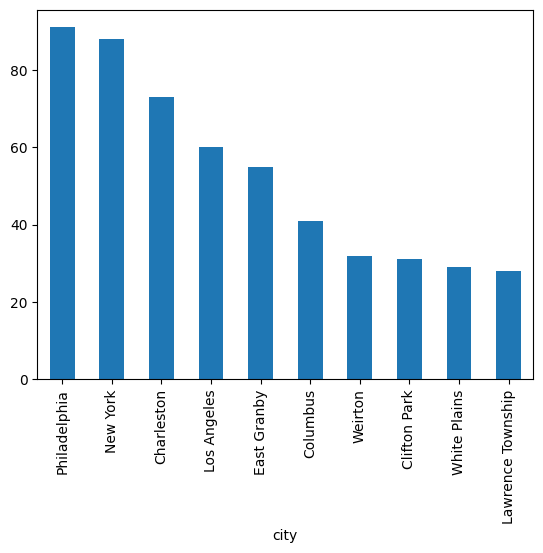

In [ ]:
#Prueba de grafico de barra con ciudades

df2["city"].value_counts().head(10).plot.bar()


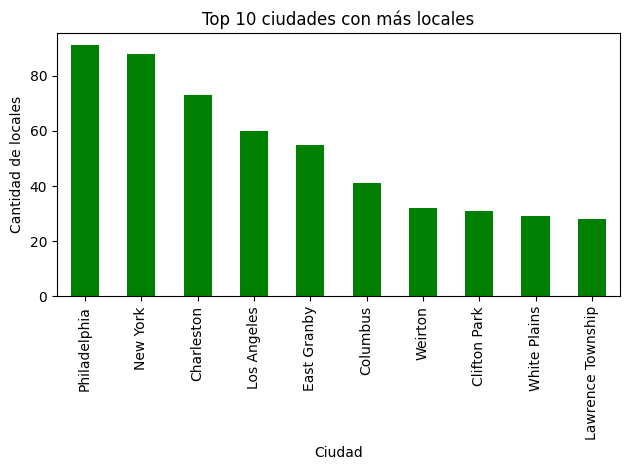

In [ ]:
# mejora tecnica

df2["city"].value_counts().head(10).plot.bar(color='Green')
plt.title("Top 10 ciudades con más locales")
plt.xlabel("Ciudad")
plt.ylabel("Cantidad de locales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


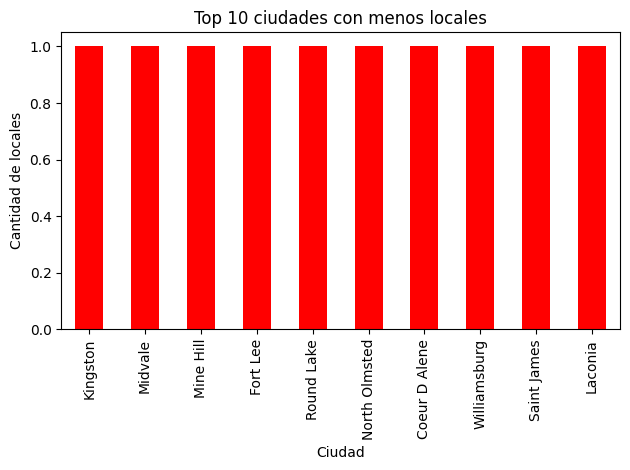

In [ ]:
# mejora tecnica

df2["city"].value_counts().tail(10).plot.bar(color='red')
plt.title("Top 10 ciudades con menos locales")
plt.xlabel("Ciudad")
plt.ylabel("Cantidad de locales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


vamos a hacer un grafico de conteo

In [ ]:
# Contar cuántos locales tiene cada ciudad
conteo_ciudades = df2["city"].value_counts()

#hacer los grupos planteandos de 1 / 2 a 10 / 11 a 20 / 21 a infinito
grupo_1 = (conteo_ciudades == 1).sum()
grupo_2_10 = ((conteo_ciudades >= 2) & (conteo_ciudades <= 10)).sum()
grupo_11_20 = ((conteo_ciudades >= 11) & (conteo_ciudades <= 20)).sum()
grupo_21_mas = (conteo_ciudades > 20).sum()

In [ ]:
#armar unas etiquetas para cada tema
etiquetas = [
    "1 solo local",
    "2 a 10 locales",
    "11 a 20 locales",
    "21 o más locales"
]
valores = [grupo_1, grupo_2_10, grupo_11_20, grupo_21_mas]

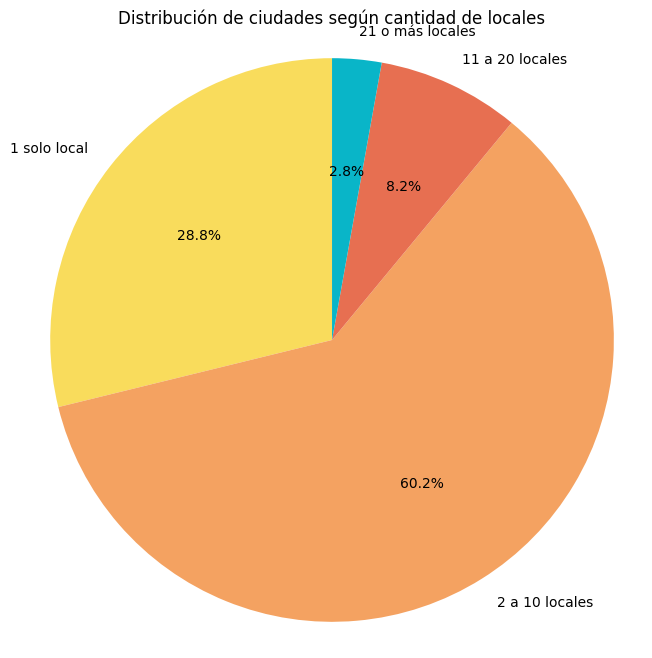

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=["#f9dc5c", "#f4a261", "#e76f51", "#09b5c8"])
plt.title("Distribución de ciudades según cantidad de locales")
plt.axis('equal')  # Para que el círculo no se vea ovalado
plt.show()

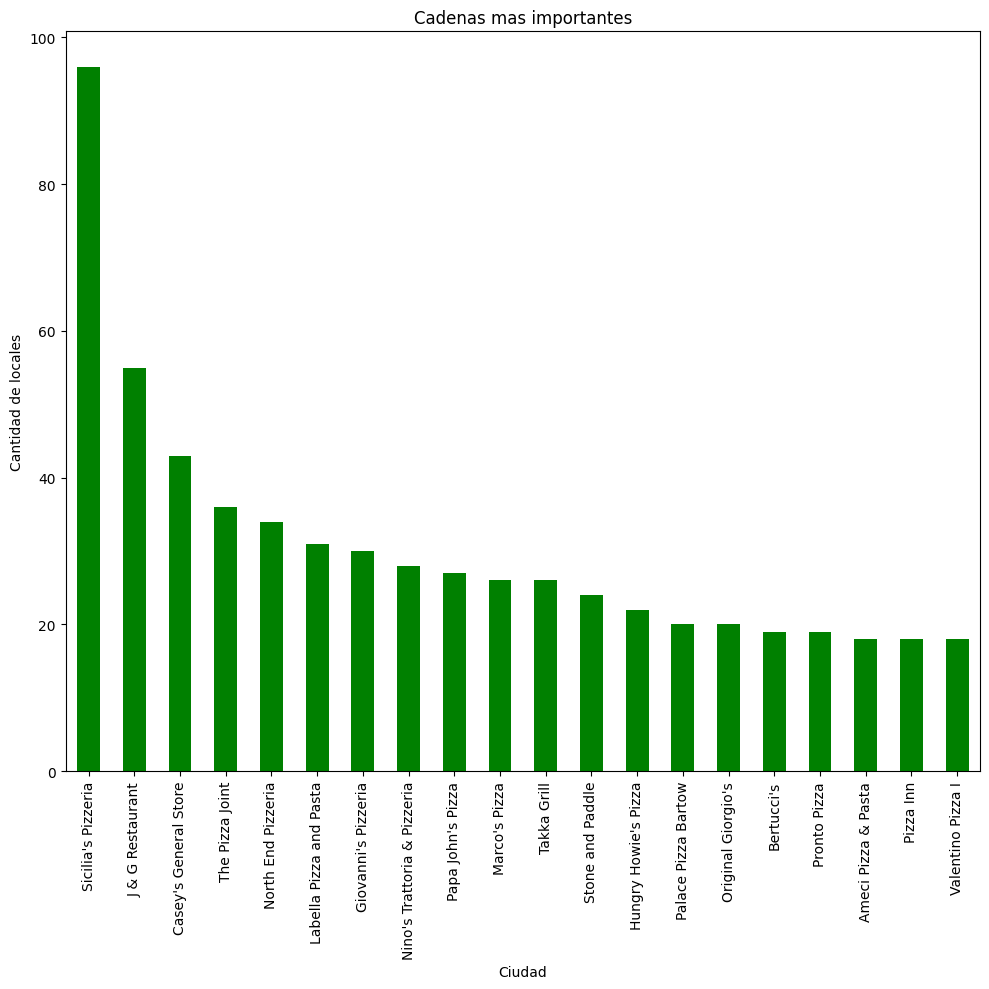

In [ ]:
plt.figure(figsize=(10, 10))
df2["name"].value_counts().head(20).plot.bar(color='Green')
plt.title("Cadenas mas importantes")
plt.xlabel("Ciudad")
plt.ylabel("Cantidad de locales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df2['name'].value_counts()

,count
name,
Sicilia's Pizzeria,96
J & G Restaurant,55
Casey's General Store,43
The Pizza Joint,36
North End Pizzeria,34
...,...
Carvalho's Brazilian Kitchen,1
Rosa Mexicano,1
Rick's Cabaret,1


In [ ]:
df2

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,4.410.266.476,-1.213.007.971,Sin menu,22.500000,...,USD,2016-03-31T02:19:42Z,Sin descripcion,Bianca Pizza,Little Pizza Paradise,97701,USD,15.607969,36.570694,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,4.410.266.476,-1.213.007.971,Sin menu,18.950000,...,USD,2016-03-31T02:19:42Z,Sin descripcion,Cheese Pizza,Little Pizza Paradise,97701,USD,15.607969,36.570694,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,3.406.456.347,-1.184.690.173,Sin menu,12.000000,...,USD,2015-10-23T03:57:26Z,Sin descripcion,"Pizza, Margherita",The Brentwood,90049,USD,50.000000,55.000000,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,3.406.456.347,-1.184.690.173,Sin menu,13.000000,...,USD,2015-10-23T03:57:26Z,Sin descripcion,"Pizza, Mushroom",The Brentwood,90049,USD,50.000000,55.000000,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,3.406.456.347,-1.184.690.173,Sin menu,13.000000,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.000000,55.000000,Brentwood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,AVweYUZ0IN2L1WUf4Z9q,305 Ash St,Bar and Gastropub,Jefferson City,US,us/honeycreek/jeffersoncity/305ashst/-735513695,38.568.717,-92.161.596,Sin menu,11.990000,...,USD,2016-07-06T20:05:49Z,Sin descripcion,Supreme Pizza,Prison Brews Brewery & Restaurant,65101,USD,25.000000,40.000000,Honey Creek
3506,AVweYUZ0IN2L1WUf4Z9q,305 Ash St,Bar and Gastropub,Jefferson City,US,us/honeycreek/jeffersoncity/305ashst/-735513695,38.568.717,-92.161.596,Sin menu,9.990000,...,USD,2016-07-06T20:05:49Z,Sin descripcion,Vegetarian Pizza,Prison Brews Brewery & Restaurant,65101,USD,25.000000,40.000000,Honey Creek
3507,AVweZ5SbIN2L1WUf4nWU,4140 Carlisle Rd,"Restaurant,Italian Restaurant",Dover,US,us/davidsburg/dover/4140carlislerd/-1821521454,39.996.444,-768.451.799,Sin menu,5.000000,...,USD,2015-10-23T01:03:47Z,Sin descripcion,Pita Pizza,Moonlight Cafe,17315,USD,0.000000,30.000000,Davidsburg
3508,AVweZ5SbIN2L1WUf4nWU,4140 Carlisle Rd,"Restaurant,Italian Restaurant",Dover,US,us/davidsburg/dover/4140carlislerd/-1821521454,39.996.444,-768.451.799,Sin menu,20.000000,...,USD,2015-10-23T01:03:47Z,Sin descripcion,Steak Pizzaiola,Moonlight Cafe,17315,USD,0.000000,30.000000,Davidsburg


<Axes: xlabel='menus.currency', ylabel='menus.amountMax'>

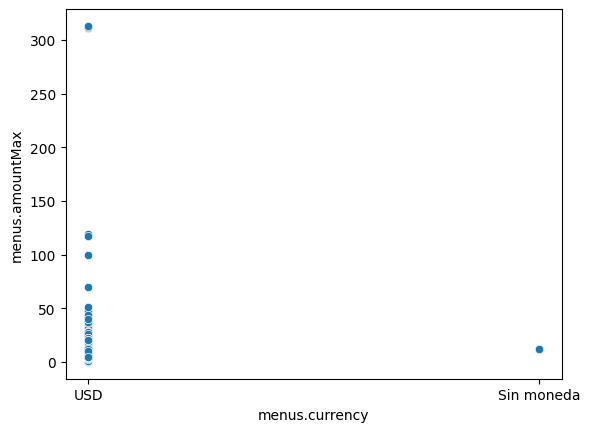

In [ ]:
sns.scatterplot(x='menus.currency', y='menus.amountMax', data=df2)

                                                  name         city  \
3431                                The James New York     New York   
1532        Camden On The Lake Resort, Spa, Yacht Club   Lake Ozark   
1533        Camden On The Lake Resort, Spa, Yacht Club   Lake Ozark   
5                                        The Brentwood  Los Angeles   
4                                        The Brentwood  Los Angeles   
3289                 Kirin Hibachi Japanese Steakhouse  Saint James   
2702  Palomino Restaurant Rotisseria (reported closed)  Minneapolis   
2703  Palomino Restaurant Rotisseria (reported closed)  Minneapolis   
2770                             Woodlands Restaurants       Galena   
3493                                     Rosa Mexicano     New York   

      priceRangeMax  
3431          666.0  
1532          363.0  
1533          363.0  
5              55.0  
4              55.0  
3289           55.0  
2702           55.0  
2703           55.0  
2770           55.0 

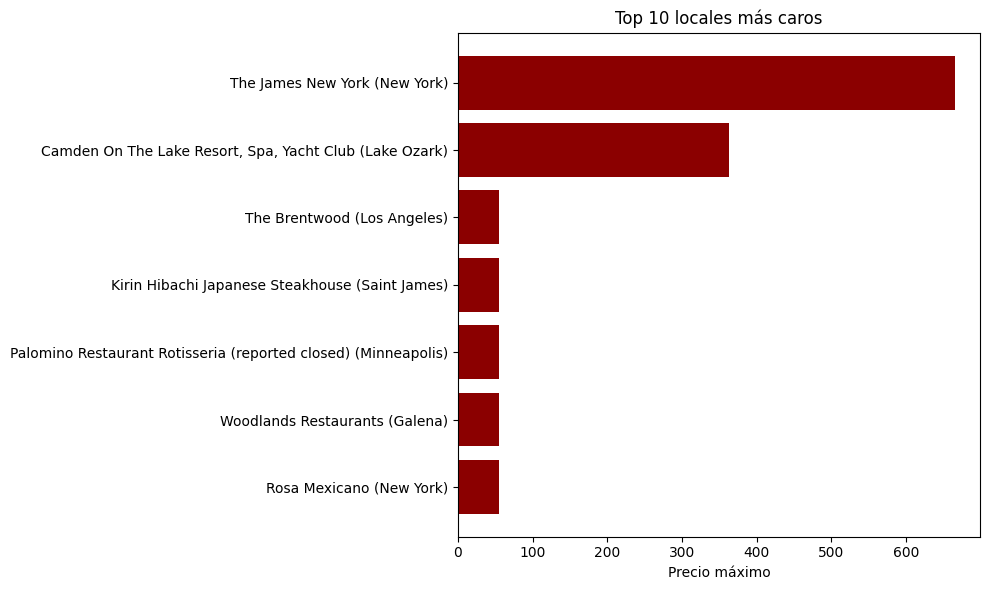

In [ ]:
# Asegurarse que priceRangeMax sea numérico
df2['priceRangeMax'] = pd.to_numeric(df2['priceRangeMax'], errors='coerce')

# Eliminar filas sin precio
df_filtrado = df2.dropna(subset=['priceRangeMax', 'name', 'city'])

# Ordenar de mayor a menor por precio
top_10_caros = df_filtrado.sort_values(by='priceRangeMax', ascending=False).head(10)

# Mostrar solo columnas clave
print(top_10_caros[['name', 'city', 'priceRangeMax']])

# Crear etiquetas con nombre + ciudad
LugaresCaros = top_10_caros['name'] + " (" + top_10_caros['city'] + ")"

plt.figure(figsize=(10, 6))
plt.barh(LugaresCaros, top_10_caros['priceRangeMax'], color='darkred')
plt.xlabel("Precio máximo")
plt.title("Top 10 locales más caros")
plt.gca().invert_yaxis()  # Para que el más caro quede arriba
plt.tight_layout()
plt.show()

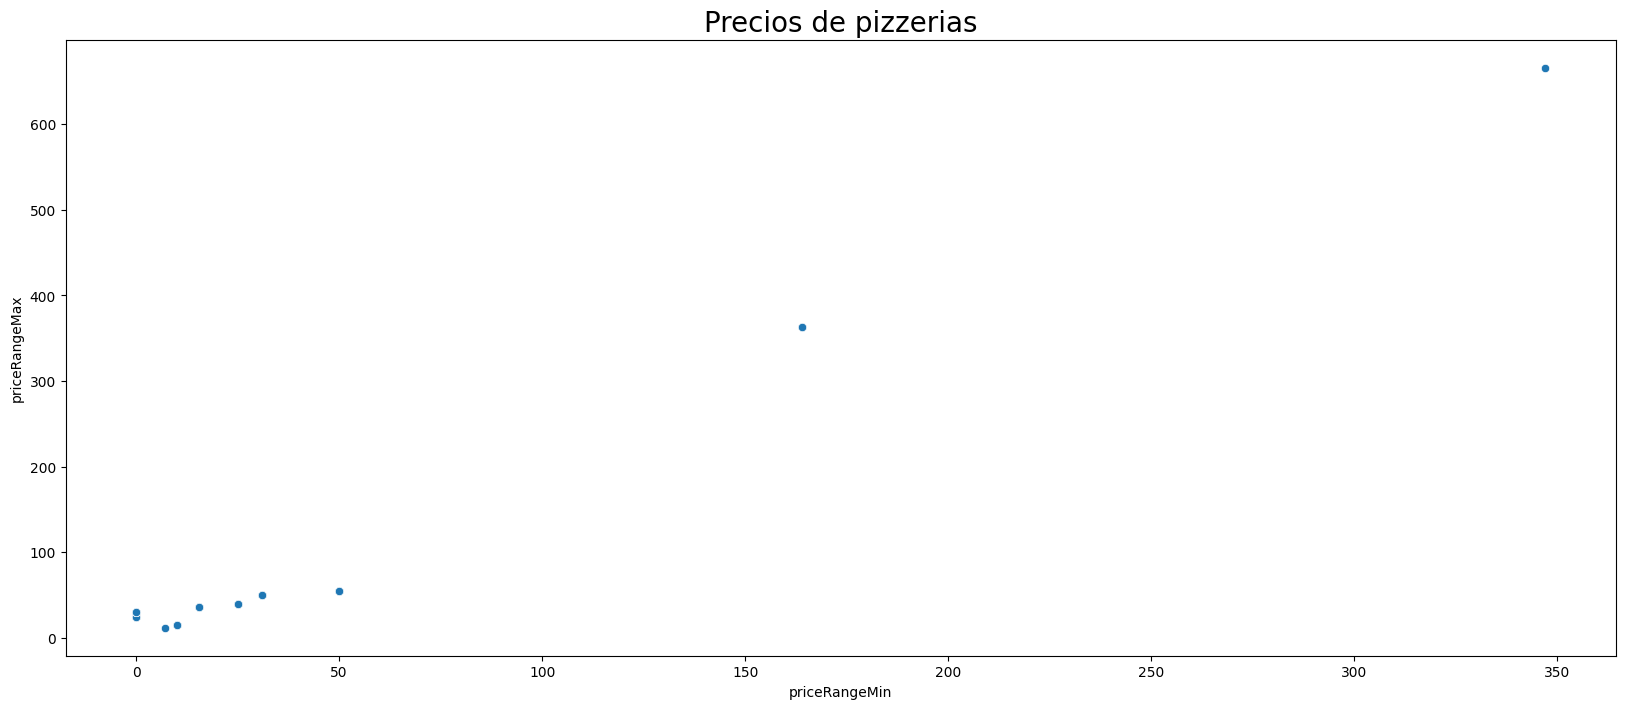

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df2['priceRangeMin'], y=df2['priceRangeMax'])
plt.title('Precios de pizzerias', fontsize = 20)
plt.show()

<Axes: xlabel='menus.currency', ylabel='priceRangeMin'>

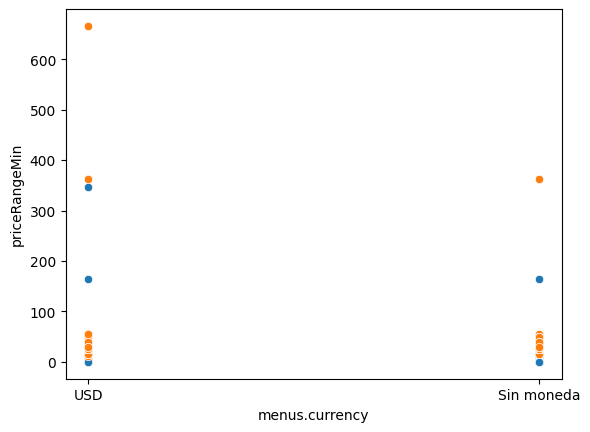

In [ ]:
#Analicis de precios
sns.scatterplot(x='menus.currency', y='priceRangeMin', data=df2)
sns.scatterplot(x='menus.currency', y='priceRangeMax', data=df2)

In [ ]:
#Calcular Q1 (Primer Cuartil) Q3 (Tercer Cuartil)
Q1 = df2['menus.amountMax'].quantile(0.25)
Q3 = df2['menus.amountMax'].quantile(0.75)
# Calcular el rango intercuartil (IQR)
IQR = Q3 - Q1
#Definir los limites para detectar Outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Para ver el valor de Q1, puede imprimirlo directamente:
print('Valor Q1:', Q1)
# Para ver el valor de Q3, puede imprimirlo directamente:
print('Valor Q3:', Q3)
# Para ver el valor de IQR, puede imprimirlo directamente:
print('Valor IQR:', IQR)
# Para ver el valor de limite_inferior, puede imprimirlo directamente:
print('Limite inferior:', limite_inferior)
# Para ver el valor de limite_superior, puede imprimirlo directamente:
print('Limite superior:', limite_superior)

Valor Q1: 8.0
Valor Q3: 14.99
Valor IQR: 6.99
Limite inferior: -2.4849999999999994
Limite superior: 25.475


In [ ]:
# Identificar outliers
df_outlier = df2[(df2['menus.amountMax'] < limite_inferior) | (df2['menus.amountMax'] > limite_superior)]

In [ ]:
df_outlier.sort_values(by='menus.amountMax', ascending=False)


,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
2573,AVwdNDAzByjofQCxmmcz,4002 Lincoln Blvd,"Pizza,Italian Restaurant Marina del Rey,Italia...",Marina Del Rey,US,us/ca/marinadelrey/4002lincolnblvd/550874219,33.990.407,-118.447.324,http://api.citygridmedia.com/content/places/v2...,312.95,...,USD,2016-11-08T02:45:57Z,"Fresh veal, roasted peppers, black olives and ...",Pizza Raviatta,Eddie's Italian Restaurant,90292,USD,25.000000,40.000000,CA
2569,AVwdNDAzByjofQCxmmcz,4002 Lincoln Blvd,"Pizza,Italian Restaurant Marina del Rey,Italia...",Marina Del Rey,US,us/ca/marinadelrey/4002lincolnblvd/550874219,33.990.407,-118.447.324,http://api.citygridmedia.com/content/places/v2...,312.95,...,USD,2016-11-08T02:45:57Z,"Ham, anchovies, roasted peppers and black olives",Pizza Claudia,Eddie's Italian Restaurant,90292,USD,25.000000,40.000000,CA
2571,AVwdNDAzByjofQCxmmcz,4002 Lincoln Blvd,"Pizza,Italian Restaurant Marina del Rey,Italia...",Marina Del Rey,US,us/ca/marinadelrey/4002lincolnblvd/550874219,33.990.407,-118.447.324,http://api.citygridmedia.com/content/places/v2...,311.95,...,USD,2016-11-08T02:45:57Z,Sin descripcion,Pizza Pepperoni,Eddie's Italian Restaurant,90292,USD,25.000000,40.000000,CA
2570,AVwdNDAzByjofQCxmmcz,4002 Lincoln Blvd,"Pizza,Italian Restaurant Marina del Rey,Italia...",Marina Del Rey,US,us/ca/marinadelrey/4002lincolnblvd/550874219,33.990.407,-118.447.324,http://api.citygridmedia.com/content/places/v2...,310.95,...,USD,2016-11-08T02:45:57Z,Fresh basil,Pizza Margarita,Eddie's Italian Restaurant,90292,USD,25.000000,40.000000,CA
900,AVwcoVmmByjofQCxgb0V,440 Park Ave S,"Restaurant,Pizza Place",New York,US,us/nyc/newyork/440parkaves/7374500,40.744.049,-73.983.838,Sin menu,118.99,...,USD,2017-04-09T18:04:35Z,Sin descripcion,Pizza,California Pizza Kitchen - Nyc,10016,USD,25.000000,40.000000,Nyc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,AVwckz7okufWRAb5wsT5,5781 Lee Blvd,"Take Out Restaurants,Restaurants,Wings Joint,P...",Lehigh Acres,US,us/fl/lehighacres/5781leeblvd/-519991802,26.620.066,-81.766.235,http://www.yellowpages.com/lehigh-acres-fl/mip...,26.00,...,USD,2016-04-01T06:29:32Z,Sin descripcion,4 Medium Cheese Pizzas,Il Primo Pizza Wings,33971,USD,15.607969,36.570694,FL
2197,AVwdHoIIkufWRAb52fwj,144 Fifth Ave S,Restaurant,Nashville,US,us/tn/nashville/144fifthaves/750765635,36.159.201,-86.777.574,Sin menu,26.00,...,USD,2016-04-24T00:00:00Z,"onions, mushrooms, garlic, tomato, oregano, ma...",New York Strip Pizzaiola,Trattoria Il Mulino - Nashville,37203,USD,31.000000,50.000000,TN
3164,AVweB5ZLIN2L1WUf1XdV,11 Prospect St,Italian Restaurant,Madison,US,us/nj/madison/11prospectst/593491984,4.075.700.689,-7.441.375.476,Sin menu,26.00,...,USD,2016-04-01T06:35:37Z,The original recipe.,Carne Alla Pizzaiola,L'allegria Restaurant,7940,USD,50.000000,55.000000,NJ
1818,AVwdcYZpkufWRAb55-A7,831 Middlefield Rd,"Pizza Place,Restaurant",Redwood City,US,us/ca/redwoodcity/831middlefieldrd/1969498020,3.748.606,-12.222.911,Sin menu,25.75,...,USD,2016-06-08T16:20:19Z,Sin descripcion,3 Toppings Pizza,Escape From New York Pizza,94063,USD,0.000000,25.000000,CA


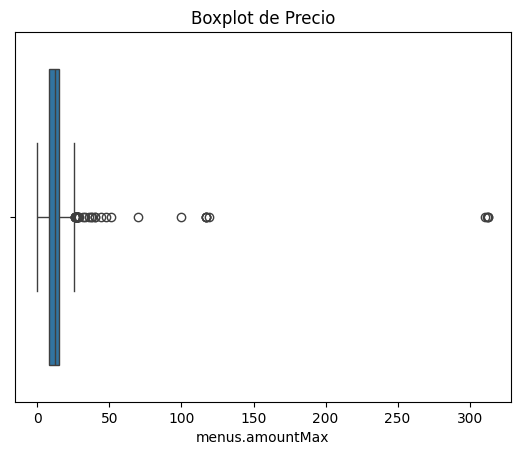

In [ ]:
#ver el outliner en la box

sns.boxplot(x='menus.amountMax',data=df2)
plt.title('Boxplot de Precio')
plt.show()

/tmp/ipython-input-3154243884.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df2['mes'] = df2['menus.dateSeen'].dt.to_period('M')


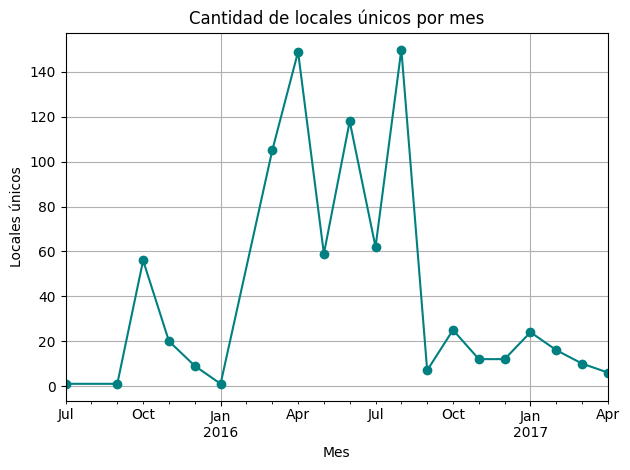

In [ ]:
#crear un grafico de liena que de las tendencias de construccion (es si es para ver cuantos locales se actualizan al mes mejor dicho)

# Convertir fecha
df2['menus.dateSeen'] = pd.to_datetime(df2['menus.dateSeen'], errors='coerce')

# Agrupar por mes
df2['mes'] = df2['menus.dateSeen'].dt.to_period('M')
locales_por_mes = df2.groupby('mes')['name'].nunique()

# Graficar
locales_por_mes.plot(kind='line', marker='o', color='teal')
plt.title("Cantidad de locales únicos por mes")
plt.xlabel("Mes")
plt.ylabel("Locales únicos")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df2['menus.dateSeen'] = df2['menus.dateSeen'].fillna('Sin registro')



# Conteo de Datos para Logaritmos

In [ ]:
df2[(df2['menus.amountMax'] < limite_inferior) | (df2['menus.amountMax'] > limite_superior)]

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,mes
194,AVwc59P_ByjofQCxjeDD,522 Saddle River Rd,"Italian Restaurant,Restaurant",Saddle Brook,US,us/nj/saddlebrook/522saddleriverrd/-615172216,4.090.908,-7.409.194,Sin menu,37.99,...,Sin registro,Sin descripcion,Order 3 Large Pizzas and Get The 4th Pizza Free,Riccardo's Pizza,7663,USD,15.607969,36.570694,NJ,NaT
226,AVwc-6fkkufWRAb51EsV,10300 Forest Hill Blvd,"Pizza Place,Take Out Restaurants,American Rest...",Wellington,US,us/villageofwellington/wellington/10300foresth...,2.664.711.379,-8.020.931.934,http://www.yellowpages.com/wellington-fl/mip/c...,116.99,...,2016-06-04 20:37:33+00:00,Sin descripcion,Pizza,California Pizza Kitchen,33414,USD,25.000000,40.000000,Village Of Wellington,2016-06
483,AVwchFuP_7pvs4fzv8Tr,3401 Esperanza Xing,"Pizza,Take Out Restaurants,Restaurants,America...",Austin,US,us/tx/austin/3401esperanzaxing/-220003116,3.040.052,-9.772.676,Sin menu,116.99,...,Sin registro,Sin descripcion,Pizza,California Pizza Kitchen,78758,USD,25.000000,40.000000,TX,NaT
534,AVwciCoiIN2L1WUfl-g0,109 W County Ctr,"Pizza Place,Restaurants,Pizza,American Restaur...",Saint Louis,US,us/countrylifeacres/saintlouis/109wcountyctr/-...,3.860.194.477,-9.044.655.146,http://www.citysearch.com/profile/menu/6834766...,116.99,...,2016-05-29 00:04:42+00:00,Sin descripcion,Pizza,California Pizza Kitchen,63131,USD,25.000000,40.000000,Country Life Acres,2016-05
719,AVwckz7okufWRAb5wsT5,5781 Lee Blvd,"Take Out Restaurants,Restaurants,Wings Joint,P...",Lehigh Acres,US,us/fl/lehighacres/5781leeblvd/-519991802,26.620.066,-81.766.235,http://www.yellowpages.com/lehigh-acres-fl/mip...,26.00,...,2016-04-01 06:29:32+00:00,Sin descripcion,4 Medium Cheese Pizzas,Il Primo Pizza Wings,33971,USD,15.607969,36.570694,FL,2016-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,AVwdwk9vkufWRAb58_hc,127 W US Highway 54,"Pizza Place,American Restaurant,Italian Restau...",Andover,US,us/ks/andover/127wushighway54/663850649,3.767.888.023,-97.136.386,Sin menu,50.99,...,Sin registro,And 50 wings,Party Cheese Pepperoni Sheet Pizza,Poplar Pizza & Restaurant,67002,USD,15.607969,36.570694,KS,NaT
3031,AVwdxpCEByjofQCxsZHK,100 S Main St,Italian Restaurant,Sayville,US,us/fireislandpines/sayville/100smainst/-117928...,40.735.908,-7.308.076.036,Sin menu,44.00,...,2016-10-29 16:12:26+00:00,Sliced sirloin steak with pepper and onions in...,Sirloin Steak Pizzaiola,Butera's Restaurant of Sayville,11782,USD,15.607969,36.570694,Fire Island Pines,2016-10
3164,AVweB5ZLIN2L1WUf1XdV,11 Prospect St,Italian Restaurant,Madison,US,us/nj/madison/11prospectst/593491984,4.075.700.689,-7.441.375.476,Sin menu,26.00,...,2016-04-01 06:35:37+00:00,The original recipe.,Carne Alla Pizzaiola,L'allegria Restaurant,7940,USD,50.000000,55.000000,NJ,2016-04
3391,AVweNQFOkufWRAb5A7ai,1411 Mountain Rd,Caf,Joppa,US,us/joppatowne/joppa/1411mountainrd/839186949,3.943.921.497,-7.634.532.504,Sin menu,39.99,...,2016-10-27 02:08:37+00:00,Sin descripcion,Crab Dip Pizza,Maria D's,21085,USD,15.607969,36.570694,Joppatowne,2016-10


In [ ]:
# Identificar outliers
df_outlier = df2[(df2['menus.amountMax'] < limite_inferior) | (df2['menus.amountMax'] > limite_superior)]

In [ ]:
#Crear una máscara identificar las filas de df que NO están en df_outlier
Sin_outlier = ~df2.index.isin(df_outlier.index)

# Seleccionar las filas de df que no son valores atípicos
df_procesado = df2[Sin_outlier]

In [ ]:
df_procesado

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,mes
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,4.410.266.476,-1.213.007.971,Sin menu,22.500000,...,2016-03-31 02:19:42+00:00,Sin descripcion,Bianca Pizza,Little Pizza Paradise,97701,USD,15.607969,36.570694,OR,2016-03
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,4.410.266.476,-1.213.007.971,Sin menu,18.950000,...,2016-03-31 02:19:42+00:00,Sin descripcion,Cheese Pizza,Little Pizza Paradise,97701,USD,15.607969,36.570694,OR,2016-03
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,3.406.456.347,-1.184.690.173,Sin menu,12.000000,...,2015-10-23 03:57:26+00:00,Sin descripcion,"Pizza, Margherita",The Brentwood,90049,USD,50.000000,55.000000,Brentwood,2015-10
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,3.406.456.347,-1.184.690.173,Sin menu,13.000000,...,2015-10-23 03:57:26+00:00,Sin descripcion,"Pizza, Mushroom",The Brentwood,90049,USD,50.000000,55.000000,Brentwood,2015-10
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,3.406.456.347,-1.184.690.173,Sin menu,13.000000,...,2015-10-23 03:57:26+00:00,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.000000,55.000000,Brentwood,2015-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,AVweYUZ0IN2L1WUf4Z9q,305 Ash St,Bar and Gastropub,Jefferson City,US,us/honeycreek/jeffersoncity/305ashst/-735513695,38.568.717,-92.161.596,Sin menu,11.990000,...,2016-07-06 20:05:49+00:00,Sin descripcion,Supreme Pizza,Prison Brews Brewery & Restaurant,65101,USD,25.000000,40.000000,Honey Creek,2016-07
3506,AVweYUZ0IN2L1WUf4Z9q,305 Ash St,Bar and Gastropub,Jefferson City,US,us/honeycreek/jeffersoncity/305ashst/-735513695,38.568.717,-92.161.596,Sin menu,9.990000,...,2016-07-06 20:05:49+00:00,Sin descripcion,Vegetarian Pizza,Prison Brews Brewery & Restaurant,65101,USD,25.000000,40.000000,Honey Creek,2016-07
3507,AVweZ5SbIN2L1WUf4nWU,4140 Carlisle Rd,"Restaurant,Italian Restaurant",Dover,US,us/davidsburg/dover/4140carlislerd/-1821521454,39.996.444,-768.451.799,Sin menu,5.000000,...,2015-10-23 01:03:47+00:00,Sin descripcion,Pita Pizza,Moonlight Cafe,17315,USD,0.000000,30.000000,Davidsburg,2015-10
3508,AVweZ5SbIN2L1WUf4nWU,4140 Carlisle Rd,"Restaurant,Italian Restaurant",Dover,US,us/davidsburg/dover/4140carlislerd/-1821521454,39.996.444,-768.451.799,Sin menu,20.000000,...,2015-10-23 01:03:47+00:00,Sin descripcion,Steak Pizzaiola,Moonlight Cafe,17315,USD,0.000000,30.000000,Davidsburg,2015-10


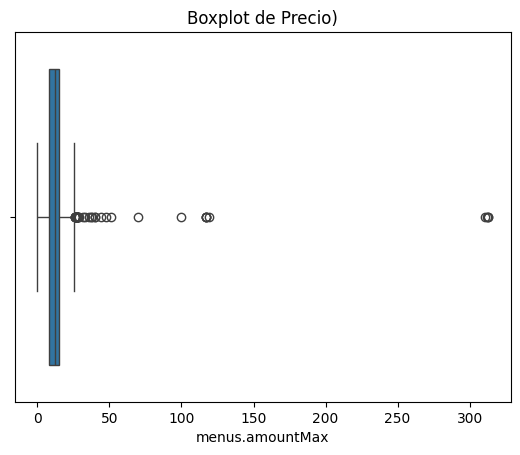

In [ ]:
sns.boxplot(x='menus.amountMax',data=df2)
plt.title('Boxplot de Precio)')
plt.show()

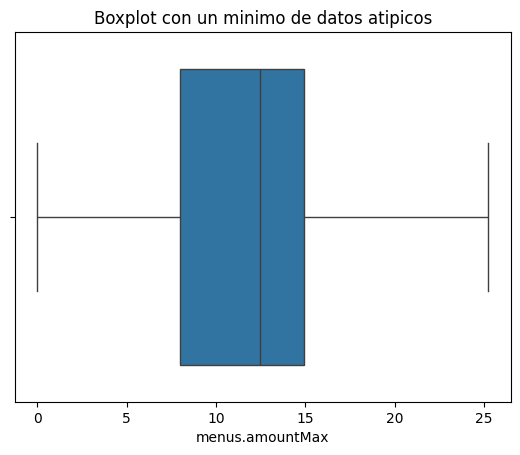

In [ ]:
sns.boxplot(x='menus.amountMax', data=df_procesado)
plt.title('Boxplot con un minimo de datos atipicos')
plt.show()

# Aplicacion de los datos Contados pata Traformacion logaritmica

In [ ]:
df_procesado['menus.Max_remplaz_log'] = np.log1p(df_procesado['menus.amountMax'])

/tmp/ipython-input-3195113237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_procesado['menus.Max_remplaz_log'] = np.log1p(df_procesado['menus.amountMax'])


In [ ]:
df_procesado['priceRangeMax_remplaz_log'] = np.log1p(df_procesado['priceRangeMax'])

/tmp/ipython-input-1517773856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_procesado['priceRangeMax_remplaz_log'] = np.log1p(df_procesado['priceRangeMax'])


Eliminar cosas CUIDADO

In [ ]:
#Vamos a sacar de aca las columnas que no usaremos en el analicis
df_procesado.drop('id', axis=1, inplace=True)
df_procesado.drop('country', axis=1, inplace=True)
df_procesado.drop('keys', axis=1, inplace=True)
df_procesado.drop('menuPageURL', axis=1, inplace=True)

/tmp/ipython-input-63502654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_procesado.drop('id', axis=1, inplace=True)
/tmp/ipython-input-63502654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_procesado.drop('country', axis=1, inplace=True)
/tmp/ipython-input-63502654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_procesado.drop('keys', axis=1, inplace=True)
/tmp/ipython-input-63502654.py:5: SettingWithCopyWarni

In [ ]:
df_procesado

,address,categories,city,latitude,longitude,menus.amountMax,menus.amountMin,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,mes,menus.Max_remplaz_log,priceRangeMax_remplaz_log
0,Cascade Village Mall Across From Target,Pizza Place,Bend,4.410.266.476,-1.213.007.971,22.500000,15.500000,USD,2016-03-31 02:19:42+00:00,Sin descripcion,Bianca Pizza,Little Pizza Paradise,97701,USD,15.607969,36.570694,OR,2016-03,3.157000,3.626224
1,Cascade Village Mall Across From Target,Pizza Place,Bend,4.410.266.476,-1.213.007.971,18.950000,18.950000,USD,2016-03-31 02:19:42+00:00,Sin descripcion,Cheese Pizza,Little Pizza Paradise,97701,USD,15.607969,36.570694,OR,2016-03,2.993229,3.626224
2,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,3.406.456.347,-1.184.690.173,12.000000,12.000000,USD,2015-10-23 03:57:26+00:00,Sin descripcion,"Pizza, Margherita",The Brentwood,90049,USD,50.000000,55.000000,Brentwood,2015-10,2.564949,4.025352
3,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,3.406.456.347,-1.184.690.173,13.000000,13.000000,USD,2015-10-23 03:57:26+00:00,Sin descripcion,"Pizza, Mushroom",The Brentwood,90049,USD,50.000000,55.000000,Brentwood,2015-10,2.639057,4.025352
4,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,3.406.456.347,-1.184.690.173,13.000000,13.000000,USD,2015-10-23 03:57:26+00:00,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.000000,55.000000,Brentwood,2015-10,2.639057,4.025352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,305 Ash St,Bar and Gastropub,Jefferson City,38.568.717,-92.161.596,11.990000,11.990000,USD,2016-07-06 20:05:49+00:00,Sin descripcion,Supreme Pizza,Prison Brews Brewery & Restaurant,65101,USD,25.000000,40.000000,Honey Creek,2016-07,2.564180,3.713572
3506,305 Ash St,Bar and Gastropub,Jefferson City,38.568.717,-92.161.596,9.990000,9.990000,USD,2016-07-06 20:05:49+00:00,Sin descripcion,Vegetarian Pizza,Prison Brews Brewery & Restaurant,65101,USD,25.000000,40.000000,Honey Creek,2016-07,2.396986,3.713572
3507,4140 Carlisle Rd,"Restaurant,Italian Restaurant",Dover,39.996.444,-768.451.799,5.000000,5.000000,USD,2015-10-23 01:03:47+00:00,Sin descripcion,Pita Pizza,Moonlight Cafe,17315,USD,0.000000,30.000000,Davidsburg,2015-10,1.791759,3.433987
3508,4140 Carlisle Rd,"Restaurant,Italian Restaurant",Dover,39.996.444,-768.451.799,20.000000,20.000000,USD,2015-10-23 01:03:47+00:00,Sin descripcion,Steak Pizzaiola,Moonlight Cafe,17315,USD,0.000000,30.000000,Davidsburg,2015-10,3.044522,3.433987


In [ ]:
df2['city'].value_counts()

,count
city,
Philadelphia,91
New York,88
Charleston,73
Los Angeles,60
East Granby,55
...,...
North Olmsted,1
Coeur D Alene,1
Williamsburg,1


Vamos a usar el Label Porque tengo muchas variantes

In [ ]:
# LabelEncoder using sklearn
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
city_label = encoder.fit_transform(df_procesado['city'])

In [ ]:
encoded_super = pd.DataFrame(city_label, columns=['Ciudades_Codificadas'])
encoded_super.head()

,Ciudades_Codificadas
0,42
1,42
2,335
3,335
4,335


In [ ]:
#concatenar las codificaciónes
df_concat = pd.concat([df_procesado,encoded_super], axis=1)
df_concat.head()

,address,categories,city,latitude,longitude,menus.amountMax,menus.amountMin,menus.currency,menus.dateSeen,menus.description,...,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,mes,menus.Max_remplaz_log,priceRangeMax_remplaz_log,Ciudades_Codificadas
0,Cascade Village Mall Across From Target,Pizza Place,Bend,4.410.266.476,-1.213.007.971,22.50,15.50,USD,2016-03-31 02:19:42+00:00,Sin descripcion,...,Little Pizza Paradise,97701,USD,15.607969,36.570694,OR,2016-03,3.157000,3.626224,42.0
1,Cascade Village Mall Across From Target,Pizza Place,Bend,4.410.266.476,-1.213.007.971,18.95,18.95,USD,2016-03-31 02:19:42+00:00,Sin descripcion,...,Little Pizza Paradise,97701,USD,15.607969,36.570694,OR,2016-03,2.993229,3.626224,42.0
2,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,3.406.456.347,-1.184.690.173,12.00,12.00,USD,2015-10-23 03:57:26+00:00,Sin descripcion,...,The Brentwood,90049,USD,50.000000,55.000000,Brentwood,2015-10,2.564949,4.025352,335.0
3,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,3.406.456.347,-1.184.690.173,13.00,13.00,USD,2015-10-23 03:57:26+00:00,Sin descripcion,...,The Brentwood,90049,USD,50.000000,55.000000,Brentwood,2015-10,2.639057,4.025352,335.0
4,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,3.406.456.347,-1.184.690.173,13.00,13.00,USD,2015-10-23 03:57:26+00:00,"Olives, onions, capers, tomatoes",...,The Brentwood,90049,USD,50.000000,55.000000,Brentwood,2015-10,2.639057,4.025352,335.0


In [ ]:
#Elimino las cosas que no voy a usar para tener en cuenta mas adelante
df_codificado = df_concat.drop(['priceRangeCurrency', 'postalCode' , 'latitude', 'longitude', 'categories', 'city','address', 'menus.description','menus.name','name','mes','menus.currency', 'menus.dateSeen','province' ], axis=1)
df_codificado.head() #Recordar que los elementos procesados siempre estan en el df_prosesado por lo tanto no tiene outliner y no tiene registros de df2

,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax,menus.Max_remplaz_log,priceRangeMax_remplaz_log,Ciudades_Codificadas
0,22.50,15.50,15.607969,36.570694,3.157000,3.626224,42.0
1,18.95,18.95,15.607969,36.570694,2.993229,3.626224,42.0
2,12.00,12.00,50.000000,55.000000,2.564949,4.025352,335.0
3,13.00,13.00,50.000000,55.000000,2.639057,4.025352,335.0
4,13.00,13.00,50.000000,55.000000,2.639057,4.025352,335.0


In [ ]:
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3509 entries, 0 to 3391
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   menus.amountMax            3444 non-null   float64
 1   menus.amountMin            3444 non-null   float64
 2   priceRangeMin              3444 non-null   float64
 3   priceRangeMax              3444 non-null   float64
 4   menus.Max_remplaz_log      3444 non-null   float64
 5   priceRangeMax_remplaz_log  3444 non-null   float64
 6   Ciudades_Codificadas       3444 non-null   float64
dtypes: float64(7)
memory usage: 219.3 KB


In [ ]:
df = df_codificado.copy()
df.head()

,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax,menus.Max_remplaz_log,priceRangeMax_remplaz_log,Ciudades_Codificadas
0,22.50,15.50,15.607969,36.570694,3.157000,3.626224,42.0
1,18.95,18.95,15.607969,36.570694,2.993229,3.626224,42.0
2,12.00,12.00,50.000000,55.000000,2.564949,4.025352,335.0
3,13.00,13.00,50.000000,55.000000,2.639057,4.025352,335.0
4,13.00,13.00,50.000000,55.000000,2.639057,4.025352,335.0


Viendo las Correlaciones

In [ ]:
#Analisis de Correlación
corr = df.corr()
corr

,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax,menus.Max_remplaz_log,priceRangeMax_remplaz_log,Ciudades_Codificadas
menus.amountMax,1.000000,0.928093,0.040783,0.032677,0.950709,0.061183,-0.028804
menus.amountMin,0.928093,1.000000,0.041985,0.039244,0.901636,0.070533,-0.029904
priceRangeMin,0.040783,0.041985,1.000000,0.819147,0.050932,0.913354,-0.004536
priceRangeMax,0.032677,0.039244,0.819147,1.000000,0.041673,0.734103,0.000083
menus.Max_remplaz_log,0.950709,0.901636,0.050932,0.041673,1.000000,0.076742,-0.037085
priceRangeMax_remplaz_log,0.061183,0.070533,0.913354,0.734103,0.076742,1.000000,0.009870
Ciudades_Codificadas,-0.028804,-0.029904,-0.004536,0.000083,-0.037085,0.009870,1.000000


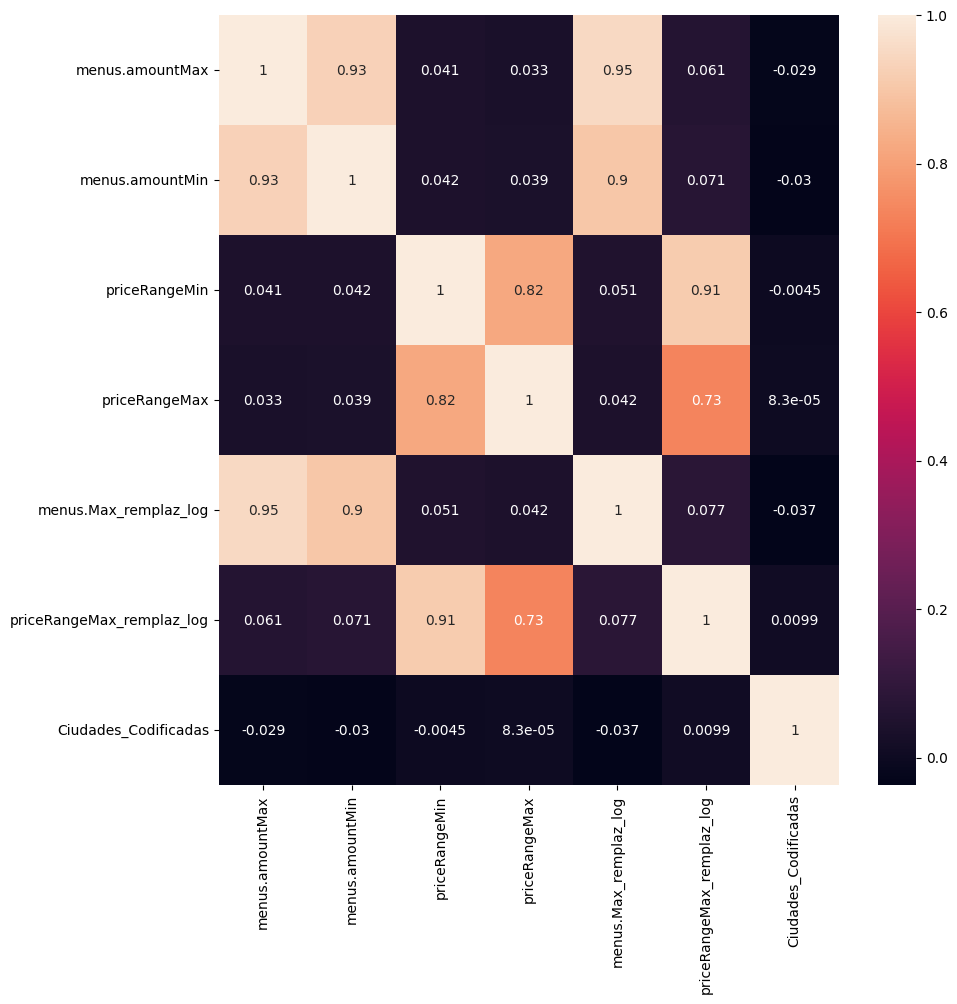

In [ ]:
#Generar un mapa de correlación sobre este dataset
fig, ax = plt.subplots(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

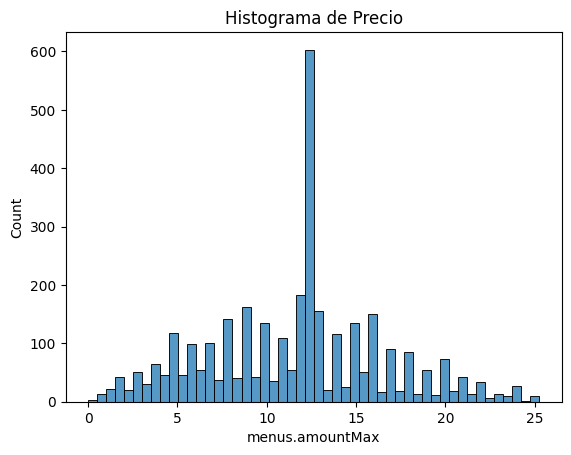

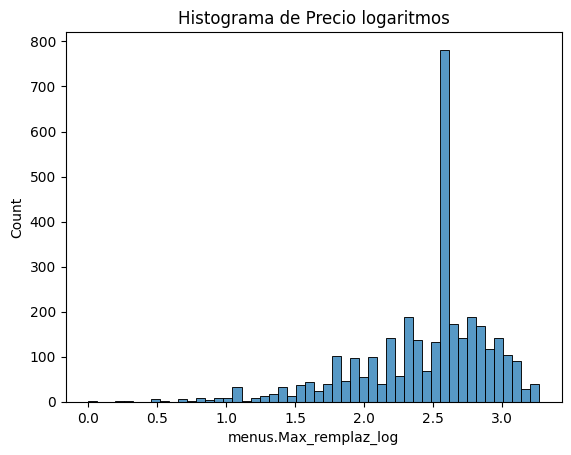

In [ ]:
sns.histplot(df_procesado['menus.amountMax'], bins=50)
plt.title('Histograma de Precio')
plt.show()

sns.histplot(df_procesado['menus.Max_remplaz_log'], bins=50)
plt.title('Histograma de Precio logaritmos')
plt.show()

# Algoritmo de Regresión



> Use el modelo de regresión ya que, ofrece un nivel de precisión elevado y un margen de error bajo, para el tipo de datos que estamos buscado ahora que es el análisis de precios y facilita una toma de decisiones más sólida frente a otras alternativas.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
#Aclaro se que literalmente estoy remplazando uno con otro al hacer esto en parte por eso despues lo vuelvo a realizar abajo solo los dejo asi para tener todos los elementos importados
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [ ]:
df.isna().sum()


,0
menus.amountMax,65
menus.amountMin,65
priceRangeMin,65
priceRangeMax,65
menus.Max_remplaz_log,65
priceRangeMax_remplaz_log,65
Ciudades_Codificadas,65


In [ ]:
# Eliminar filas que tengan al menos un NaN
df_clean = df.dropna()

# Ver cuántas filas quedaron
print(df_clean.shape)


(3379, 7)


In [ ]:
df_final = df_clean.copy()

In [ ]:
df_final

,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax,menus.Max_remplaz_log,priceRangeMax_remplaz_log,Ciudades_Codificadas
0,22.50,15.50,15.607969,36.570694,3.157000,3.626224,42.0
1,18.95,18.95,15.607969,36.570694,2.993229,3.626224,42.0
2,12.00,12.00,50.000000,55.000000,2.564949,4.025352,335.0
3,13.00,13.00,50.000000,55.000000,2.639057,4.025352,335.0
4,13.00,13.00,50.000000,55.000000,2.639057,4.025352,335.0
...,...,...,...,...,...,...,...
3439,19.99,18.99,25.000000,40.000000,3.044046,3.713572,282.0
3440,12.99,7.99,25.000000,40.000000,2.638343,3.713572,282.0
3441,8.99,8.99,25.000000,40.000000,2.301585,3.713572,154.0
3442,2.79,2.79,25.000000,40.000000,1.332366,3.713572,154.0


In [ ]:
#Selección de Variables
X = df_final.drop('menus.amountMax', axis=1).values #Elimino de mi dataset la variable a predecir
y = df_final['menus.amountMax'].values #Defino el Target

In [ ]:
#Validación del primer registro
X[0:1]

array([[15.5       , 15.60796915, 36.57069409,  3.15700042,  3.62622433,
        42.        ]])

In [ ]:
#Validación del segundo registro
y[0:1]

array([22.5])

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#Datos y_train
y_train

array([ 2.75, 12.95, 17.49, ..., 12.99, 11.49, 10.  ])

In [ ]:
#Datos y_test
y_test

array([10.95,  1.2 , 15.  , ..., 14.99, 10.5 ,  6.95])

In [ ]:
#Cantidad de Datos Parciales
X_train.shape, X_test.shape

((2365, 6), (1014, 6))

In [ ]:
#Cantidad de Datos Parciales
y_train.shape, y_test.shape

((2365,), (1014,))

In [ ]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

np.float64(-4.981066584651375)

In [ ]:
regressor.coef_

array([ 3.98051928e-01,  1.22306400e-02, -2.76539387e-03,  6.39459571e+00,
       -9.51234680e-01,  3.67586451e-05])

In [ ]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)

In [ ]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
pred

,Actual,Predicted
0,10.95,11.893563
1,1.20,-2.612207
2,15.00,15.382900
3,10.00,10.997539
4,3.99,3.534744
...,...,...
1009,24.25,21.980681
1010,4.25,4.160008
1011,14.99,15.547527
1012,10.50,11.468252


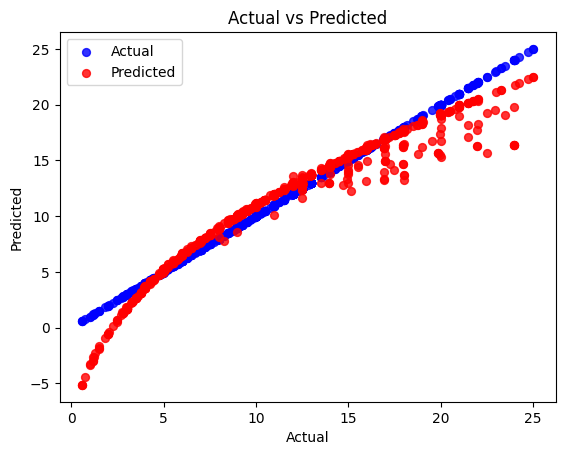

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(pred['Actual'], pred['Actual'], color='blue', label='Actual', s=32, alpha=0.8)
plt.scatter(pred['Actual'], pred['Predicted'], color='red', label='Predicted', s=32, alpha=0.8)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

# Metricas 1

In [ ]:
# Error Cuadratico Medio (Promedio del cuadrado de los errores entre los valores reales y predichos)
from sklearn.metrics import mean_squared_error
print('El MSE es:',mean_squared_error(y_test,y_pred))

El MSE es: 1.6386279825902044


In [ ]:
# Raiz de Error Cuadratico medio (Raiz cuadrada de la distancia cuadratica promedio entre los valores reales y predichos)
from sklearn import metrics
import numpy as np
print('El RMSE es:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

El RMSE es: 1.2800890526014994


In [ ]:
#Error Promedio Absoluto (Calcula como la media absoluta entre los valores reales y predichos)
from sklearn.metrics import mean_absolute_error
print('El MAE es:',mean_absolute_error(y_test,y_pred))

El MAE es: 0.8795491825450681


In [ ]:
# R Cuadrado
from sklearn.metrics import r2_score
print('El R^2 es:',r2_score(y_test,y_pred))

El R^2 es: 0.9318360646926525


In [ ]:
#Conteo de datos
print('Datos a tener en cuenta para la Primera variante')
print('El MSE es:',mean_squared_error(y_test,y_pred))
print('El RMSE es:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Datos a tener en cuenta para la Primera variante
El MSE es: 1.6386279825902044
El RMSE es: 1.2800890526014994
MAE: 0.8795491825450681
R²: 0.9318360646926525


En teoria hay una prediccion del 93%

# Modelo 2 de regresion "Random Forest"

In [ ]:
#Selección de Variables 2
X = df_final.drop('menus.amountMax', axis=1).values #Elimino de mi dataset la variable a predecir
y = df_final['menus.amountMax'].values #Defino el Target

In [ ]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predicciones
y_pred = model.predict(X_test)

In [ ]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
pred

,Actual,Predicted
0,7.00,7.0000
1,6.95,6.9500
2,10.00,10.0000
3,16.95,16.9500
4,19.85,19.8510
...,...,...
671,4.00,3.9999
672,18.99,18.9901
673,19.99,19.9886
674,16.99,16.9898


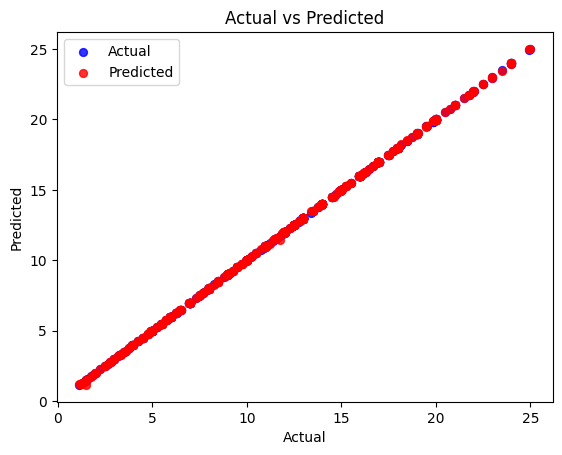

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(pred['Actual'], pred['Actual'], color='blue', label='Actual', s=32, alpha=0.8)
plt.scatter(pred['Actual'], pred['Predicted'], color='red', label='Predicted', s=32, alpha=0.8)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
#Conteo de datos
print('Datos a tener en cuenta para la segunda variante')
print('El MSE es:',mean_squared_error(y_test,y_pred))
print('El RMSE es:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Datos a tener en cuenta para la segunda variante
El MSE es: 0.0004470054881656829
El RMSE es: 0.0211425043021323
MAE: 0.003796301775152957
R²: 0.9999814595100575


Este al tener en 99,99% de acierto presente overfit

In [ ]:
#Selección de Variables 2 con otro datos
X = df_final.drop('menus.Max_remplaz_log', axis=1).values #Elimino de mi dataset la variable a predecir
y = df_final['menus.Max_remplaz_log'].values #Defino el Target

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#Cantidad de Datos Parciales
X_train.shape, X_test.shape

((2365, 6), (1014, 6))

In [ ]:
#Cantidad de Datos Parciales
y_train.shape, y_test.shape

((2365,), (1014,))

In [ ]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_
regressor.coef_
#Realizando las predicciones
y_pred = regressor.predict(X_test)

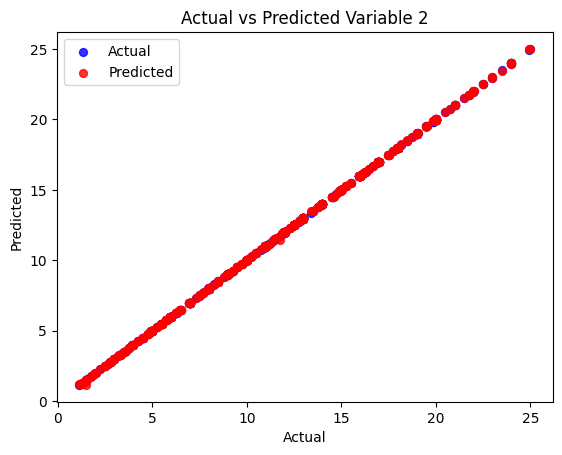

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(pred['Actual'], pred['Actual'], color='blue', label='Actual', s=32, alpha=0.8)
plt.scatter(pred['Actual'], pred['Predicted'], color='red', label='Predicted', s=32, alpha=0.8)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Variable 2")
plt.legend()
plt.show()

In [ ]:
#Conteo de datos
print('Datos a tener en cuenta para la tercera variante')
print('El MSE es:',mean_squared_error(y_test,y_pred))
print('El RMSE es:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Datos a tener en cuenta para la tercera variante
El MSE es: 0.020789875069999596
El RMSE es: 0.14418694486672362
MAE: 0.1009243501778736
R²: 0.908221173641582


# **Contemplación del modelo de aprendizaje**

El análisis se estructura en dos enfoques complementarios: por un lado, la exploración gráfica de variables cualitativas, como la distribución de locales y ciudades con mayor o menor concentración de registros, lo que permite identificar patrones de interés para posibles inversiones. Por otro lado, se aplica un modelo de regresión con el objetivo de comprender la dinámica de los precios y generar aprendizajes a partir de los datos cuantitativos. Esta combinación no solo facilita visualizar la competencia y las oportunidades de expansión, sino que también aporta referencias sólidas sobre valores de mercado, brindando un marco más completo para la toma de decisiones.

# **Mas Modelos**

A continuación, se presentan los diferentes análisis realizados durante la etapa exploratoria, junto con la aplicación de dos modelos y el entrenamiento de distintos algoritmos.

# Ver el Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Entrenar árbol de regresión
dc_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
dc_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [ ]:
# Predicción
y_pred = dc_tree.predict(X_test)
#Conteo de datos
print('Datos a tener en cuenta para Decision Tree')
print('El MSE es:',mean_squared_error(y_test,y_pred))
print('El RMSE es:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Datos a tener en cuenta para Decision Tree
El MSE es: 0.0019491764578504099
El RMSE es: 0.04414947856827315
MAE: 0.0336005053523209
R²: 0.9905863769340075


# **Algoritmo de Clasificacion**

Dejo a continuación los análisis realizados para que puedan ser revisados, pero aclaro que se trata de material adicional. Como se comentó en clase, se sugirió explorar ambos modelos; sin embargo, el modelo que considero más adecuado y que se utiliza como principal en este proyecto es el de regresión.

In [ ]:
df_final

,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax,menus.Max_remplaz_log,priceRangeMax_remplaz_log,Ciudades_Codificadas
0,22.50,15.50,15.607969,36.570694,3.157000,3.626224,42.0
1,18.95,18.95,15.607969,36.570694,2.993229,3.626224,42.0
2,12.00,12.00,50.000000,55.000000,2.564949,4.025352,335.0
3,13.00,13.00,50.000000,55.000000,2.639057,4.025352,335.0
4,13.00,13.00,50.000000,55.000000,2.639057,4.025352,335.0
...,...,...,...,...,...,...,...
3439,19.99,18.99,25.000000,40.000000,3.044046,3.713572,282.0
3440,12.99,7.99,25.000000,40.000000,2.638343,3.713572,282.0
3441,8.99,8.99,25.000000,40.000000,2.301585,3.713572,154.0
3442,2.79,2.79,25.000000,40.000000,1.332366,3.713572,154.0


In [ ]:
#Selección de Variables
X = df_final.drop('Ciudades_Codificadas', axis=1).values #Elimino de mi dataset la variable a predecir
y = df_final['Ciudades_Codificadas'].values #Defino el Target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Aplicacion del algoritmo de decisión con limitación de ramas
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
model = clf.fit(X_train, y_train)

In [ ]:
#Aplicacion del algoritmo de decisión con limitación de ramas
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
model = clf.fit(X_train, y_train)

In [ ]:
y_test_pred = model.predict(X_test) #Prediccion en Test
y_train_pred = model.predict(X_train) #Prediccion en Train

In [ ]:
y_train_pred

array([416., 633., 416., ..., 416., 416., 416.])

In [ ]:
y_test_pred

array([416., 633., 416., ..., 633., 416., 416.])

In [ ]:
#Generar un dataframe entre train y train_predict
df_train = pd.DataFrame({'Real': y_train, 'Prediccion': y_train_pred})
df_train

,Real,Prediccion
0,196.0,416.0
1,633.0,633.0
2,177.0,416.0
3,385.0,416.0
4,619.0,416.0
...,...,...
2360,270.0,416.0
2361,287.0,416.0
2362,477.0,416.0
2363,70.0,416.0


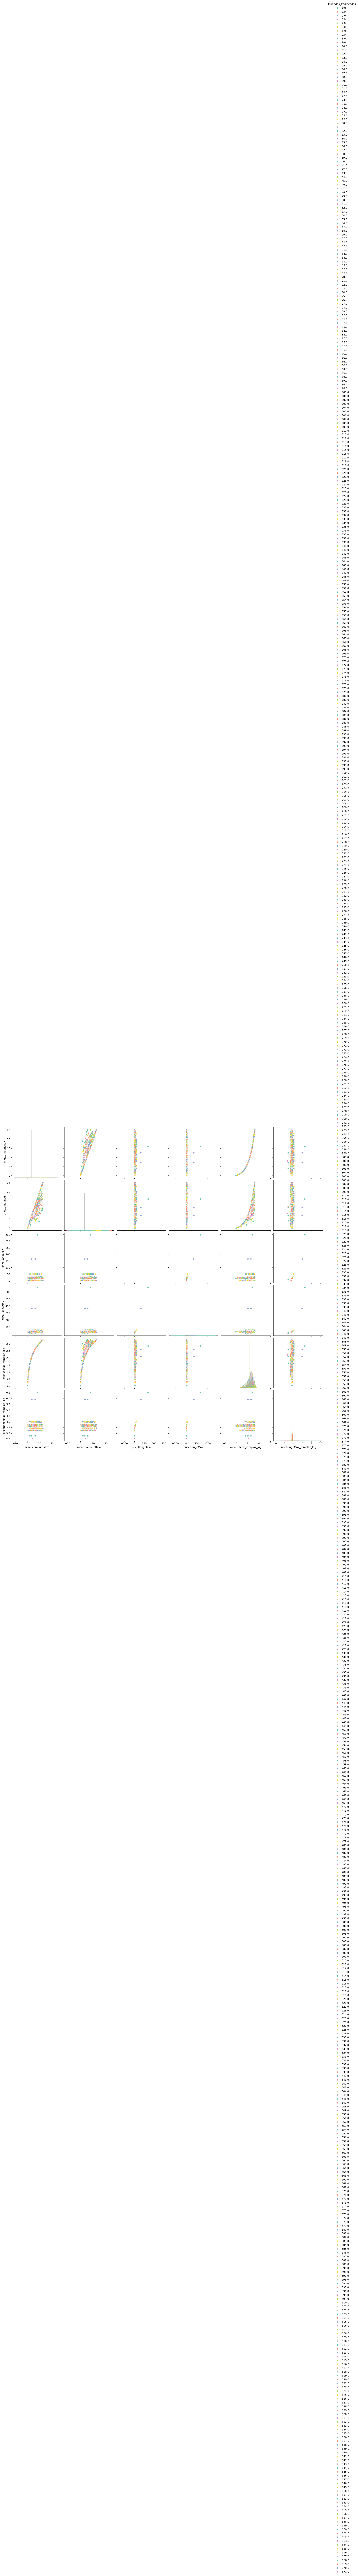

In [ ]:
#Pairplot
sns.pairplot(df_final,hue = 'Ciudades_Codificadas' , height = 3 , palette = 'Set2') #diag_kind='hist'

Al observar la gran cantidad de variables presentes en el enfoque inicial de clasificación, opto por explorar otras alternativas. Sin embargo, la opción que resulta más adecuada para los objetivos del proyecto es el uso de modelos de regresión.

In [ ]:
df_final

,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax,menus.Max_remplaz_log,priceRangeMax_remplaz_log,Ciudades_Codificadas
0,22.50,15.50,15.607969,36.570694,3.157000,3.626224,42.0
1,18.95,18.95,15.607969,36.570694,2.993229,3.626224,42.0
2,12.00,12.00,50.000000,55.000000,2.564949,4.025352,335.0
3,13.00,13.00,50.000000,55.000000,2.639057,4.025352,335.0
4,13.00,13.00,50.000000,55.000000,2.639057,4.025352,335.0
...,...,...,...,...,...,...,...
3439,19.99,18.99,25.000000,40.000000,3.044046,3.713572,282.0
3440,12.99,7.99,25.000000,40.000000,2.638343,3.713572,282.0
3441,8.99,8.99,25.000000,40.000000,2.301585,3.713572,154.0
3442,2.79,2.79,25.000000,40.000000,1.332366,3.713572,154.0


 **Ver el Decision Tree en clasificación**

In [ ]:
# Cargar los datos
# Elegís tus variables independientes (X) y la dependiente (y)

X2 = df_final[['menus.amountMax', 'menus.amountMin', 'priceRangeMin', 'priceRangeMax']]
y2 = df_final['Ciudades_Codificadas']   # Ejemplo: tu target son las ciudades

In [ ]:
X2

,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax
0,22.50,15.50,15.607969,36.570694
1,18.95,18.95,15.607969,36.570694
2,12.00,12.00,50.000000,55.000000
3,13.00,13.00,50.000000,55.000000
4,13.00,13.00,50.000000,55.000000
...,...,...,...,...
3439,19.99,18.99,25.000000,40.000000
3440,12.99,7.99,25.000000,40.000000
3441,8.99,8.99,25.000000,40.000000
3442,2.79,2.79,25.000000,40.000000


In [ ]:
y2

,Ciudades_Codificadas
0,42.0
1,42.0
2,335.0
3,335.0
4,335.0
...,...
3439,282.0
3440,282.0
3441,154.0
3442,154.0


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.4, random_state=0)

In [ ]:
#Cantidad de Datos Parciales
X_train.shape, X_test.shape

((2027, 4), (1352, 4))

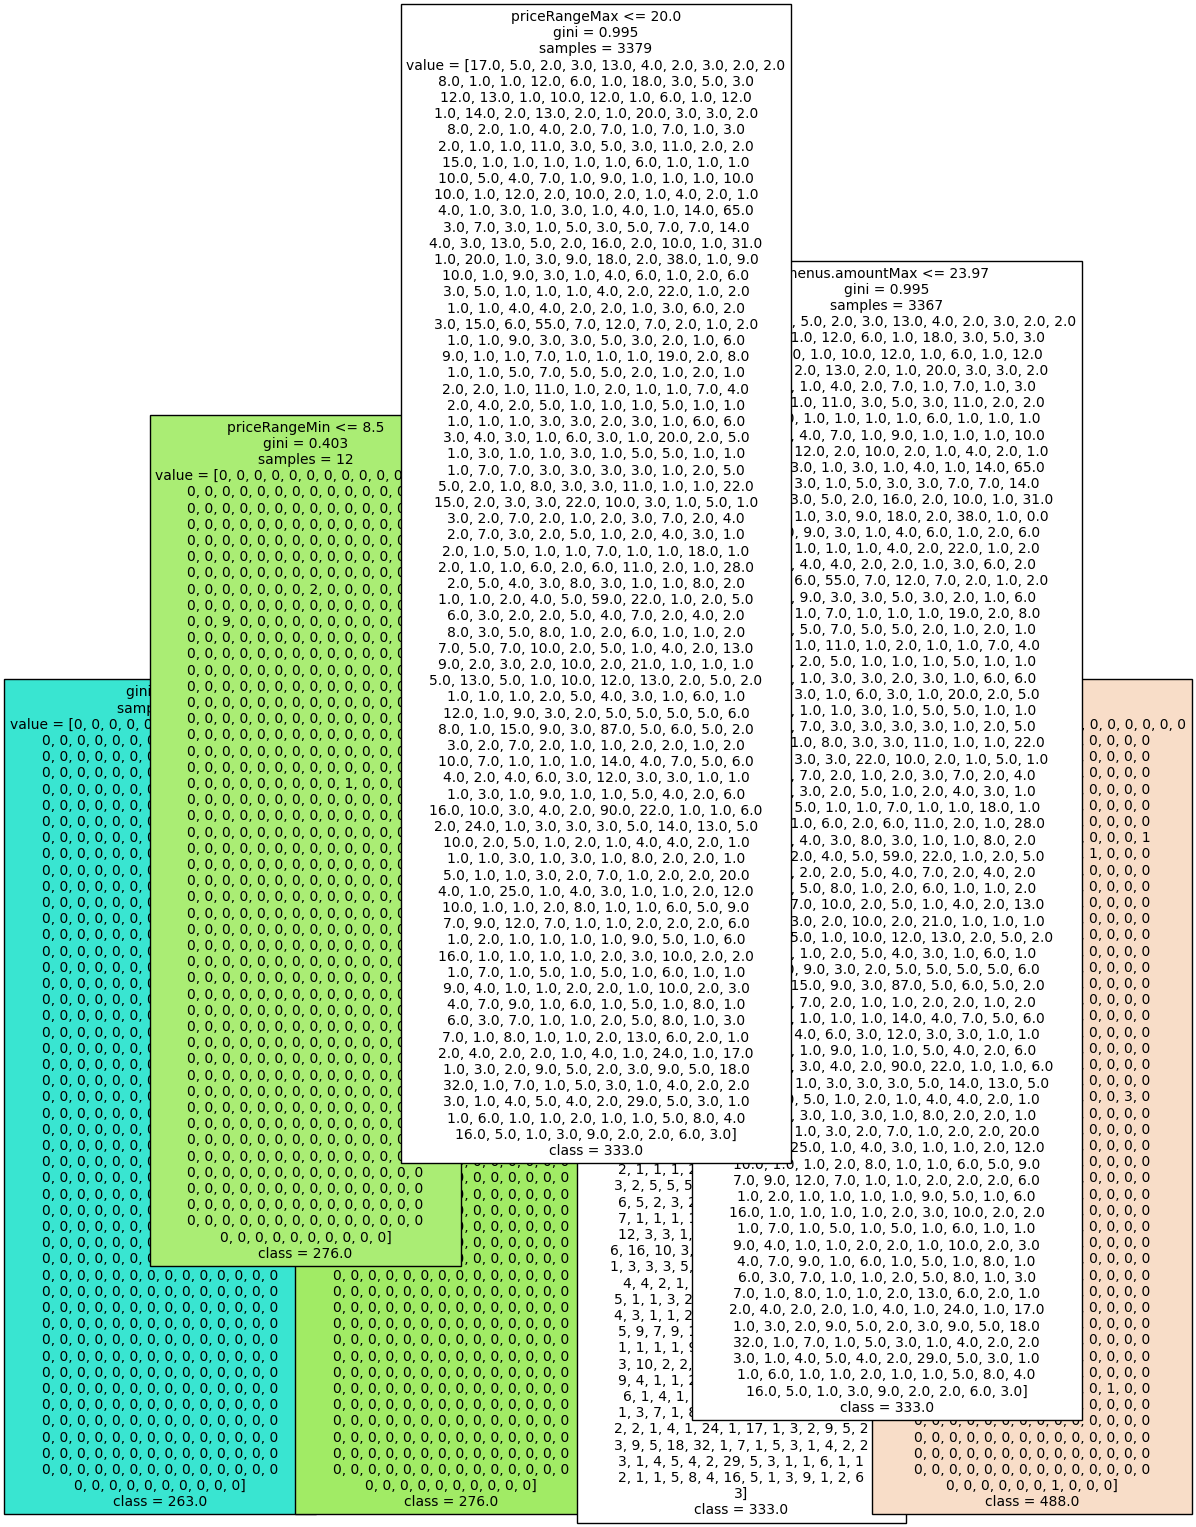

In [ ]:
# Entrenar el árbol
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
clf = clf.fit(X2, y2)

# Nombres de las columnas (features)
feature_names = ['menus.amountMax', 'menus.amountMin', 'priceRangeMin', 'priceRangeMax']

# Si y son textos (ej: ciudades), los paso como class_names
class_names = df_final['Ciudades_Codificadas'].unique().astype(str)

# Graficar
plt.figure(figsize=(15,10))
tree.plot_tree(clf,
               feature_names=feature_names,
               class_names=class_names,
               filled=True,
               fontsize=10)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=6, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, random_state=0)

In [ ]:
#Realizando las predicciones
y_pred = regr.predict(X_test)

In [ ]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
pred

,Actual,Predicted
0,335.0,306.065248
1,481.0,314.359150
2,632.0,339.810070
3,381.0,369.271976
4,226.0,311.094702
...,...,...
1347,59.0,305.172573
1348,35.0,299.893269
1349,367.0,363.654394
1350,659.0,335.241065


In [ ]:
# Error Cuadratico Medio (Promedio del cuadrado de los errores entre los valores reales y predichos)
from sklearn.metrics import mean_squared_error
print('El MSE es:',mean_squared_error(y_test,y_pred))

El MSE es: 37468.04871664617


In [ ]:
# Raiz de Error Cuadratico medio (Raiz cuadrada de la distancia cuadratica promedio entre los valores reales y predichos)
from sklearn import metrics
import numpy as np
print('El RMSE es:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

El RMSE es: 193.56665187125122


In [ ]:
#Error Promedio Absoluto (Calcula como la media absoluta entre los valores reales y predichos)
from sklearn.metrics import mean_absolute_error
print('El MAE es:',mean_absolute_error(y_test,y_pred))

El MAE es: 166.62031623526536


In [ ]:
# R Cuadrado
from sklearn.metrics import r2_score
print('El R^2 es:',r2_score(y_test,y_pred))

El R^2 es: 0.021186937218397817


Algoritmo 3

In [ ]:
#Aplicacion del algoritmo de decisión con limitación de ramas
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
model = clf.fit(X_train, y_train)

In [ ]:
y_test_pred = model.predict(X_test) #Prediccion en Test
y_train_pred = model.predict(X_train) #Prediccion en Train

In [ ]:
df_train = pd.DataFrame({'Real': y_train, 'Prediccion': y_train_pred})
df_train

,Real,Prediccion
2619,633.0,416.0
1521,132.0,416.0
1913,161.0,118.0
606,467.0,416.0
2045,454.0,416.0
...,...,...
853,270.0,416.0
3328,287.0,416.0
1686,477.0,416.0
2656,70.0,416.0


In [ ]:
#Generar un dataframe entre test y test_predict
df_test = pd.DataFrame({'Real': y_test, 'Prediccion': y_test_pred})
df_test

,Real,Prediccion
1326,335.0,416.0
667,481.0,416.0
652,632.0,416.0
2760,381.0,416.0
1711,226.0,416.0
...,...,...
3399,59.0,416.0
2423,35.0,416.0
1652,367.0,416.0
945,659.0,416.0


In [ ]:
# Matriz de Confusión
from sklearn import metrics
metrics.confusion_matrix(y_test, y_test_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#metricas generales
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         8
         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         5
         5.0       0.00      0.00      0.00         3
         6.0       0.00      0.00      0.00         2
        10.0       0.00      0.00      0.00         5
        12.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         7
        14.0       0.00      0.00      0.00         2
        16.0       0.00      0.00      0.00         9
        17.0       0.00      0.00      0.00         1
        18.0       0.00      0.00      0.00         3
        20.0       0.00      0.00      0.00         4
        21.0       0.00      0.00      0.00         5
        23.0       0.00      0.00      0.00         7
        24.0       0.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=42, n_estimators=10)
model.fit(X_train, y_train)
model.fit(X_test, y_test)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
y_test_pred_rand = model.predict(X_test) #Prediccion en Test
y_train_pred_rand = model.predict(X_train) #Prediccion en Train

In [ ]:
#metricas generales
print(metrics.classification_report(y_test, y_test_pred_rand))

              precision    recall  f1-score   support

         0.0       0.25      0.25      0.25         8
         1.0       0.67      0.67      0.67         3
         2.0       1.00      1.00      1.00         1
         3.0       0.00      0.00      0.00         2
         4.0       1.00      0.80      0.89         5
         5.0       0.67      0.67      0.67         3
         6.0       1.00      0.50      0.67         2
        10.0       0.00      0.00      0.00         5
        12.0       0.00      0.00      0.00         1
        13.0       0.12      0.29      0.17         7
        14.0       0.00      0.00      0.00         2
        16.0       0.43      0.67      0.52         9
        17.0       0.00      0.00      0.00         1
        18.0       0.00      0.00      0.00         3
        20.0       0.80      1.00      0.89         4
        21.0       0.33      0.40      0.36         5
        23.0       0.75      0.43      0.55         7
        24.0       1.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Conclucion final

Se concluye que las ciudades dentro del top 10 con mayor cantidad de pizzerías presentan un nivel de competencia demasiado elevado, por lo que no resultan prioritarias para una futura expansión. En su lugar, es más conveniente dirigir la atención hacia localidades con menor presencia de locales, analizando por su puesto, los factores culturales, tradicionales o demográficos que podrían explicar esta baja representación y que se necesitaria un analicis mas exautivo que de la que nos dan estos datos globales. El hecho de que un 62% de las localidades se encuentren dentro del ranking indica que aún existe un margen de crecimiento no explotado, lo que hace recomendable profundizar la investigación en estas áreas para detectar oportunidades estratégicas.


En cuanto al análisis de modelos y algoritmos aplicados a los precios máximos, se determinó que la regresión lineal ofrece el mejor rendimiento. Este modelo presenta un margen de error reducido y estable, evitando tanto la sobreajuste (Overfit) como predicciones poco fiables. La principal conclusión es que estas predicciones permiten establecer métricas sólidas para cada región de Estados Unidos, proporcionando una referencia confiable sobre los precios a considerar en caso de evaluar futuras inversiones en dichas ciudades.

**Modelo elegido y justificación**

Por este motivo, considero que la regresión lineal es el modelo con mayor potencial de progreso, ya que en las pruebas de entrenamiento alcanza un nivel de acierto del 93%. Este desempeño lo ubica en una posición óptima para el análisis, manteniendo un rango de error lo suficientemente bajo como para ser aplicado en escenarios reales.

Como alternativa secundaria, en caso de ser necesario, se incorpora la variante logarítmica, que presenta un 90% de precisión. No obstante, esta opción se desarrolla principalmente como apoyo al modelo principal, dado que las hipótesis y preguntas de investigación se sostienen de manera más sólida con la regresión lineal, la cual se considera el algoritmo más adecuado para este proyecto.